# **Multi-layer Perceptron**


In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 11.8841 - mae: 3.0359

2024-01-15 18:42:25.681418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 17ms/step - loss: 11.9932 - mae: 3.0490
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 10.9104 - mae: 2.9486
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 10.0237 - mae: 2.8395
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 9.3494 - mae: 2.7389
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 8.7804 - mae: 2.6456
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 8.2458 - mae: 2.5511
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 7.7413 - mae: 2.4593
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 7.2382 - mae: 2.3654
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 6.7320 - mae: 2.2732
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 6.1865 - mae: 2.1710
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 5.7489 - mae

2024-01-15 18:42:32.193160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2024-01-15 18:42:32.442246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-01-15 18:42:32.684015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


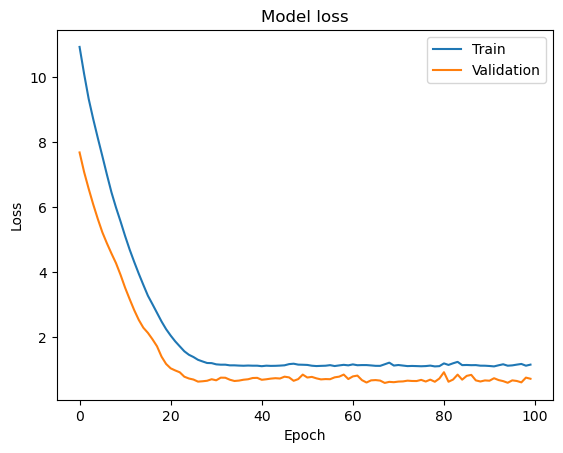

In [10]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment:** what is a Validation Set? or validation loss?

---

# Early Stopping of Epochs

Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 13.5606

2024-01-15 18:42:42.687956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 31ms/step - loss: 11.8430 - val_loss: 7.9985
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 10.8166 - val_loss: 7.3326
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 9.8959

2024-01-15 18:42:42.946720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 12ms/step - loss: 9.9006 - val_loss: 6.7236
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 9.1608 - val_loss: 6.2131
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 8.4227 - val_loss: 5.7332
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 7.7481 - val_loss: 5.2583
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 7.1627 - val_loss: 4.8577
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 6.6563 - val_loss: 4.5010
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 6.1584 - val_loss: 4.2069
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 5.7108 - val_loss: 3.9292
Epoch 11/100
7/7 [==============================] - 0s 11ms/step - loss: 5.3178 - val_loss: 3.6741
Epoch 12/100
7/7 [==============================] - 0s 11ms/step - loss: 4.9277 - val_loss: 3.3943
Epoch 13/100
7/7 [===========

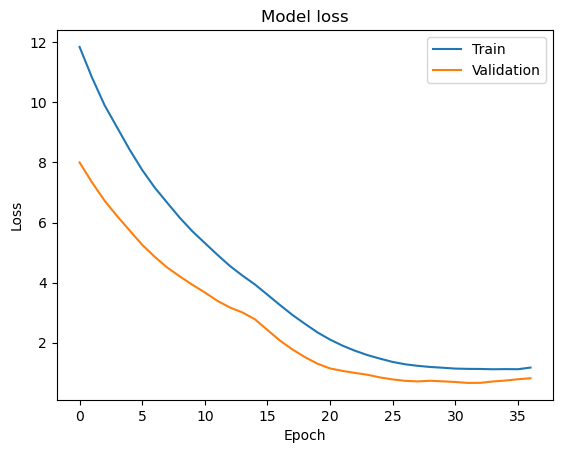

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()